In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [3]:
df = pd.read_csv('BenchmarkingSample20230607.csv')
df

,Unit,Period,Days,Account,Amount
0,00040302CD88,1,30,Sales,89952
1,00040302CD88,2,31,Sales,90594
2,00040302CD88,3,30,Sales,81909
3,00040302CD88,4,31,Sales,87418
4,00040302CD88,5,31,Sales,91109
...,...,...,...,...,...
6043,0004030BEB57,20,30,Other Non-controllables,1455
6044,0004030BEB57,21,31,Other Non-controllables,7456
6045,0004030BEB57,22,31,Other Non-controllables,2037
6046,0004030BEB57,23,28,Other Non-controllables,2037


## Mean Analysis

In [4]:
calculate = df.pivot_table(index=['Unit', 'Period'], columns='Account', values='Amount', aggfunc='sum').reset_index()

Calculate Total cost and profit based on 'calculate'

In [5]:
# Create L&P table
output = pd.DataFrame()
output['Unit'] = calculate['Unit']


output['Total Cost of Sales'] = calculate['Cost of Sales - Food'] + calculate['Cost of Sales - Paper']
output['Gross Profit'] = calculate['Sales'] - output['Total Cost of Sales']
output['Total Labor'] = calculate[['Crew Labor', 'Management Labor', 'Other Labor-related Costs']].sum(axis=1)
output['Total Prime Costs'] = output['Total Cost of Sales'] + output['Total Labor']
output['Total Controllable Costs'] =  calculate[['Crew Labor','Management Labor','Other Labor-related Costs','Advertising','Promotion','Outside Services','Maintenance & Repair','Other Controllables','Utilities']].sum(axis=1)
output['Controllable Profit'] = output['Gross Profit'] - output['Total Controllable Costs']
output['Total Non-controllable Costs'] = calculate['Rent'] + calculate['Other Non-controllables']
output['Store EBITDA'] = output['Gross Profit'] - output['Total Controllable Costs'] - output['Total Non-controllable Costs']

output

,Unit,Total Cost of Sales,Gross Profit,Total Labor,Total Prime Costs,Total Controllable Costs,Controllable Profit,Total Non-controllable Costs,Store EBITDA
0,00040302CD88,22747,67205,7898,30645,34531,32674,7269,25405
1,00040302CD88,22934,67660,9330,32264,29278,38382,7740,30642
2,00040302CD88,21822,60087,8033,29855,27747,32340,6944,25396
3,00040302CD88,23055,64363,49056,72111,71261,-6898,7184,-14082
4,00040302CD88,23669,67440,42535,66204,64950,2490,6218,-3728
...,...,...,...,...,...,...,...,...,...
211,0004030BEB57,109793,264704,94918,204711,139868,124836,91047,33789
212,0004030BEB57,121644,303041,114744,236388,156370,146671,120684,25987
213,0004030BEB57,112525,250680,103340,215865,148349,102331,86448,15883
214,0004030BEB57,110105,247506,105045,215150,141023,106483,84785,21698


In [195]:
output.to_excel('RMS_calculation.xlsx', index=False)

Mean Analysis

In [61]:
# Create a sample time series data
data = output
mean_data = pd.DataFrame(data)

# Calculate the SMA with a window size of 3
mean_data['Total Cost of Sales_SMA'] = output['Total Cost of Sales'].rolling(window=3).mean().shift(1)
mean_data['Gross Profit_SMA'] = output['Gross Profit'].rolling(window=3).mean().shift(1)
mean_data['Total Labor_SMA'] = output['Total Labor'].rolling(window=3).mean().shift(1)
mean_data['Total Prime Costs_SMA'] = output['Total Prime Costs'].rolling(window=3).mean().shift(1)
mean_data['Total Controllable Costs_SMA'] = output['Total Controllable Costs'].rolling(window=3).mean().shift(1)
mean_data['Controllable Profit_SMA'] = output['Controllable Profit'].rolling(window=3).mean().shift(1)
mean_data['Total Non-controllable Costs_SMA'] = output['Total Non-controllable Costs'].rolling(window=3).mean().shift(1)
mean_data['Store EBITDA_SMA'] = output['Store EBITDA'].rolling(window=3).mean().shift(1)
 

mean_data = mean_data.round(2)
mean_data

,Unit,Total Cost of Sales,Gross Profit,Total Labor,Total Prime Costs,Total Controllable Costs,Controllable Profit,Total Non-controllable Costs,Store EBITDA,Total Cost of Sales_SMA,Gross Profit_SMA,Total Labor_SMA,Total Prime Costs_SMA,Total Controllable Costs_SMA,Controllable Profit_SMA,Total Non-controllable Costs_SMA,Store EBITDA_SMA
0,00040302CD88,22747,67205,7898,30645,34531,32674,7269,25405,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,00040302CD88,22934,67660,9330,32264,29278,38382,7740,30642,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,00040302CD88,21822,60087,8033,29855,27747,32340,6944,25396,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,00040302CD88,23055,64363,49056,72111,71261,-6898,7184,-14082,22501.00,64984.00,8420.33,30921.33,30518.67,34465.33,7317.67,27147.67
4,00040302CD88,23669,67440,42535,66204,64950,2490,6218,-3728,22603.67,64036.67,22139.67,44743.33,42762.00,21274.67,7289.33,13985.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,0004030BEB57,109793,264704,94918,204711,139868,124836,91047,33789,110940.67,265129.33,103760.00,214700.67,148373.33,116756.00,92481.33,24274.67
212,0004030BEB57,121644,303041,114744,236388,156370,146671,120684,25987,110990.67,266104.33,98210.00,209200.67,141025.67,125078.67,91994.67,33084.00
213,0004030BEB57,112525,250680,103340,215865,148349,102331,86448,15883,114948.33,281048.33,104379.67,219328.00,146175.67,134872.67,102668.33,32204.33
214,0004030BEB57,110105,247506,105045,215150,141023,106483,84785,21698,114654.00,272808.33,104334.00,218988.00,148195.67,124612.67,99393.00,25219.67


In [62]:
mean_data.to_excel('SMA.xlsx')

In [32]:
mean_data['Unit'].value_counts()

00040302CD88    24
00040302CE36    24
00040302CF03    24
00040302CF28    24
00040302D006    24
00040302D014    24
0004030A635E    24
0004030B92EE    24
0004030BEB57    24
Name: Unit, dtype: int64

In [58]:
unit1_code = '0004030BEB57'
unit1 = mean_data[mean_data['Unit'] == unit1_code]
unit1

,Unit,Total Cost of Sales,Gross Profit,Total Labor,Total Prime Costs,Total Controllable Costs,Controllable Profit,Total Non-controllable Costs,Store EBITDA,Total Cost of Sales_SMA,Gross Profit_SMA,Total Labor_SMA,Total Prime Costs_SMA,Total Controllable Costs_SMA,Controllable Profit_SMA,Total Non-controllable Costs_SMA,Store EBITDA_SMA
192,0004030BEB57,99876,321112,107974,207850,159882,161230,96708,64522,100887.00,229897.67,99328.67,200215.67,139090.00,90807.67,75233.33,15574.33
193,0004030BEB57,107006,337896,121547,228553,173445,164451,104138,60313,102132.00,264817.33,104481.67,206613.67,147581.67,117235.67,84452.33,32783.33
194,0004030BEB57,87907,283583,113283,201190,160648,122935,85811,37124,104850.00,305666.00,113146.00,217996.00,162534.67,143131.33,96031.67,47099.67
195,0004030BEB57,102332,327898,103121,205453,156188,171710,100005,71705,98263.00,314197.00,114268.00,212531.00,164658.33,149538.67,95552.33,53986.33
196,0004030BEB57,98462,308631,112152,210614,161464,147167,98416,48751,99081.67,316459.00,112650.33,211732.00,163427.00,153032.00,96651.33,56380.67
197,0004030BEB57,96842,298928,106655,203497,155691,143237,94918,48319,96233.67,306704.00,109518.67,205752.33,159433.33,147270.67,94744.00,52526.67
198,0004030BEB57,103480,329215,113082,216562,171708,157507,105901,51606,99212.00,311819.00,107309.33,206521.33,157781.00,154038.00,97779.67,56258.33
199,0004030BEB57,90848,279933,99483,190331,142464,137469,91909,45560,99594.67,312258.00,110629.67,210224.33,162954.33,149303.67,99745.00,49558.67
200,0004030BEB57,104676,320695,130420,235096,176099,144596,103453,41143,97056.67,302692.00,106406.67,203463.33,156621.00,146071.00,97576.00,48495.00
201,0004030BEB57,93472,275132,104414,197886,150140,124992,88860,36132,99668.00,309947.67,114328.33,213996.33,163423.67,146524.00,100421.00,46103.00


In [43]:
def move_avg(step, mean_data, unit_code):
    # Create a sample time series data
    mean_data = mean_data[mean_data['Unit'] == unit1_code]
    
    # Calculate the SMA with a window size of step
    mean_data['Total Cost of Sales_SMA'] = output['Total Cost of Sales'].rolling(window=step).mean().shift(1)
    mean_data['Gross Profit_SMA'] = output['Gross Profit'].rolling(window=step).mean().shift(1)
    mean_data['Total Labor_SMA'] = output['Total Labor'].rolling(window=step).mean().shift(1)
    mean_data['Total Prime Costs_SMA'] = output['Total Prime Costs'].rolling(window=step).mean().shift(1)
    mean_data['Total Controllable Costs_SMA'] = output['Total Controllable Costs'].rolling(window=step).mean().shift(1)
    mean_data['Controllable Profit_SMA'] = output['Controllable Profit'].rolling(window=step).mean().shift(1)
    mean_data['Total Non-controllable Costs_SMA'] = output['Total Non-controllable Costs'].rolling(window=step).mean().shift(1)
    mean_data['Store EBITDA_SMA'] = output['Store EBITDA'].rolling(window=step).mean().shift(1)


    mean_data = mean_data.round(2)
    return mean_data

In [44]:
step = 3
unit1 = move_avg(step, mean_data.copy(), unit1_code)

In [24]:
unit1

,Unit,Total Cost of Sales_SMA,Gross Profit_SMA,Total Labor_SMA,Total Prime Costs_SMA,Total Controllable Costs_SMA,Controllable Profit_SMA,Total Non-controllable Costs_SMA,Store EBITDA_SMA
24,00040302CE36,43209.33,87050.00,46632.00,89841.33,72776.33,14273.67,7080.33,7193.33
25,00040302CE36,45383.67,110921.67,51693.00,97076.67,78542.00,32379.67,17324.33,15055.33
26,00040302CE36,50174.00,144460.33,59087.00,109261.00,90413.00,54047.33,30232.00,23815.33
27,00040302CE36,52520.33,173367.33,65161.33,117681.67,96555.00,76812.33,42490.00,34322.33
28,00040302CE36,56605.67,185466.00,68394.33,125000.00,101281.33,84184.67,45979.67,38205.00
29,00040302CE36,56262.33,183722.00,68719.00,124981.33,100101.67,83620.33,45313.00,38307.33
30,00040302CE36,55573.67,176040.00,66906.33,122480.00,97763.00,78277.00,44192.00,34085.00
31,00040302CE36,55371.00,173794.33,67043.00,122414.00,99401.67,74392.67,45683.33,28709.33
32,00040302CE36,56239.00,172244.00,66125.33,122364.33,98639.33,73604.67,46299.00,27305.67
33,00040302CE36,58805.00,180592.33,70419.00,129224.00,102349.67,78242.67,48197.67,30045.00


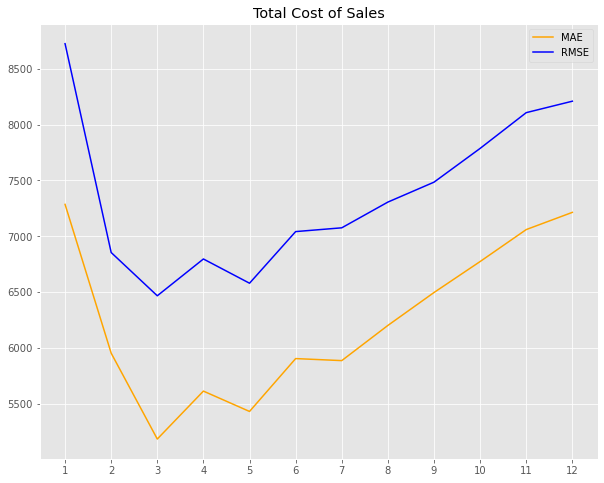

In [59]:
MAE_total_cost_list = []
RMSE_total_cost_list = []
for step in [i for i in range(1, 13)]:
    unit1 = move_avg(step, mean_data.copy(), unit1_code)
    MAE_total_cost_list.append(abs(unit1['Total Cost of Sales'] - unit1['Total Cost of Sales_SMA']).mean())
    RMSE_total_cost_list.append(math.sqrt(np.mean(abs(unit1['Total Cost of Sales'] - unit1['Total Cost of Sales_SMA'])**2)))
    #print(MAE_total_cost_list)
MAE_total_cost_list = np.array(MAE_total_cost_list)
RMSE_total_cost_list = np.array(RMSE_total_cost_list)

fig, ax = plt.subplots(1,1, figsize = (10, 8))
ax.plot(MAE_total_cost_list, label = 'MAE', color = 'orange')
ax.plot(RMSE_total_cost_list, label = 'RMSE', color = 'blue')
ax.set_xticks(range(12))
ax.set_xticklabels(range(1,13))
ax.legend()
ax.set_title('Total Cost of Sales')
plt.show()

In [17]:
[i for i in range(1, 13)]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

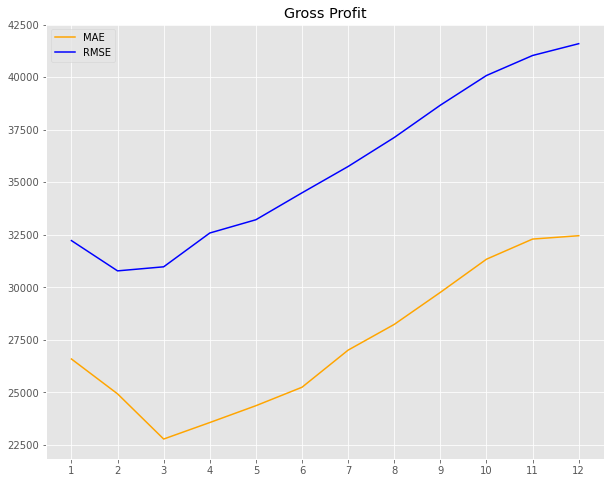

In [60]:
MAE_total_cost_list = []
RMSE_total_cost_list = []
for step in [i for i in range(1, 13)]:
    unit1 = move_avg(step, mean_data.copy(), unit1_code)
    MAE_total_cost_list.append(abs(unit1['Gross Profit'] - unit1['Gross Profit_SMA']).mean())
    RMSE_total_cost_list.append(math.sqrt(np.mean(abs(unit1['Gross Profit'] - unit1['Gross Profit_SMA'])**2)))
    #print(MAE_total_cost_list)
MAE_total_cost_list = np.array(MAE_total_cost_list)
RMSE_total_cost_list = np.array(RMSE_total_cost_list)

fig, ax = plt.subplots(1,1, figsize = (10, 8))
ax.plot(MAE_total_cost_list, label = 'MAE', color = 'orange')
ax.plot(RMSE_total_cost_list, label = 'RMSE', color = 'blue')
ax.set_xticks(range(12))
ax.set_xticklabels(range(1,13))
ax.legend()
ax.set_title('Gross Profit')
plt.show()

In [19]:
MAE_total_cost_list

array([6075.34782609, 5861.18181818, 5519.41285714, 6013.2875    ,
       6089.96842105, 6666.59333333, 6949.74764706, 7630.703125  ,
       8174.578     , 9067.17142857, 9209.93769231, 8866.52166667])

In [20]:
mean_data = mean_data[['Unit',
       'Total Cost of Sales_SMA', 'Gross Profit_SMA', 'Total Labor_SMA',
       'Total Prime Costs_SMA', 'Total Controllable Costs_SMA',
       'Controllable Profit_SMA', 'Total Non-controllable Costs_SMA',
       'Store EBITDA_SMA']]

mean_data

,Unit,Total Cost of Sales_SMA,Gross Profit_SMA,Total Labor_SMA,Total Prime Costs_SMA,Total Controllable Costs_SMA,Controllable Profit_SMA,Total Non-controllable Costs_SMA,Store EBITDA_SMA
0,00040302CD88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,00040302CD88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,00040302CD88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,00040302CD88,22501.00,64984.00,8420.33,30921.33,30518.67,34465.33,7317.67,27147.67
4,00040302CD88,22603.67,64036.67,22139.67,44743.33,42762.00,21274.67,7289.33,13985.33
...,...,...,...,...,...,...,...,...,...
211,0004030BEB57,110940.67,265129.33,103760.00,214700.67,148373.33,116756.00,92481.33,24274.67
212,0004030BEB57,110990.67,266104.33,98210.00,209200.67,141025.67,125078.67,91994.67,33084.00
213,0004030BEB57,114948.33,281048.33,104379.67,219328.00,146175.67,134872.67,102668.33,32204.33
214,0004030BEB57,114654.00,272808.33,104334.00,218988.00,148195.67,124612.67,99393.00,25219.67


In [199]:
# Export mean_data 

mean_data.to_excel('RMS_SMA.xlsx', index=False)